<a href="https://colab.research.google.com/github/HafidzNDP/Python-Basic/blob/main/Python_EDA_Module_Day_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python Pandas Notebook**
this notebook is for understanding the python EDA

last update: 2021-06-17

by: Hafidz NDP

## What You Need to Do
1. Open this gdrive folder: https://drive.google.com/drive/folders/1sjyZNq_iFOCGmA0BWsg823zW5KyEOztd?usp=sharing
2. Create folder in there with format: {your_name}_day22
3. Create Google Colab file in that folder



## *Content*
- Handle Missing Data
- Handle Date Column
- Handle Outlier
- Handle Non-Metric Data
- Pandas Pipeline

# **Preparation**

In [ ]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [ ]:
# mounted google drive
import google.colab as gc
gc.drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# check the path
!pwd

/content


In [ ]:
# change folder
%cd '/content/drive/My Drive/Dibimbing/Batch 3/Class-20210717-03/data_file'

/content/drive/My Drive/Dibimbing/Batch 3/Class-20210717-03/data_file


In [ ]:
# check file in folder
!ls

 all_energy_statistics.csv		  earthquake_data.csv
 combats.csv				  melb_data.csv
'Copy of data_student.pkl'		  pokemon.csv
'Copy of earthquake_data.csv'		  pokemon_id_each_team.csv
'Copy of melb_data.csv'			  quiz_data.json
'Copy of quiz_data.json'		 'social media visitors.gsheet'
'Copy of social media visitors.gsheet'	  student_grade_prediction.xlsx
'Copy of student_grade_prediction.xlsx'   team_combat.csv
'Copy of USA_Housing.csv'		  USA_Housing.csv
 data_student.pkl


# **Handle Missing Data**

In [ ]:
# read the data
df = pd.read_csv('property data.csv')
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [ ]:
# simple data checking - get row and column of dataframe
print(df.shape)

(9, 7)


In [ ]:
# simple data checking - get columns name
print(df.columns)

Index(['PID', 'ST_NUM', 'ST_NAME', 'OWN_OCCUPIED', 'NUM_BEDROOMS', 'NUM_BATH',
       'SQ_FT'],
      dtype='object')


In [ ]:
# simple data checking - get dataframe general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [ ]:
# check standard missing value - 1 column
df[df['PID'].isnull()]

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
4,NaN,203.0,BERKELEY,Y,3,2,1600


In [ ]:
# check standard missing value - multiple column
df[df.isnull().any(axis=1)]

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN


In [ ]:
df.isnull().any(axis=0)

PID              True
ST_NUM           True
ST_NAME         False
OWN_OCCUPIED     True
NUM_BEDROOMS     True
NUM_BATH         True
SQ_FT            True
dtype: bool

In [ ]:
df.isnull().any(axis=1)

0    False
1    False
2     True
3     True
4     True
5     True
6     True
7     True
8    False
dtype: bool

In [ ]:
# non-standard missing value
missing_values = ['na','--','n/a']
df[df.isin(missing_values).any(axis=1)]

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [ ]:
# unexpected missing value
df[~df['OWN_OCCUPIED'].isin(['Y','N'])]

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950


In [ ]:
# check number of rows per unique values
df['OWN_OCCUPIED'].value_counts()

Y     5
N     2
12    1
Name: OWN_OCCUPIED, dtype: int64

In [ ]:
# handle missing data - drop row
dropped_df = df.copy()
dropped_df.dropna(axis=0,inplace=True)
dropped_df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [ ]:
dropped_df = df.copy()
dropped_df_2 = dropped_df.dropna(axis=0,inplace=False)
dropped_df_2

In [ ]:
# handle missing data - drop column
dropped_df = df.copy()
dropped_df.dropna(axis=1,inplace=True)
dropped_df

,ST_NAME
0,PUTNAM
1,LEXINGTON
2,LEXINGTON
3,BERKELEY
4,BERKELEY
5,BERKELEY
6,WASHINGTON
7,TREMONT
8,TREMONT


In [ ]:
# handle missing data - replace values with mean - 1 column
replaced_value_df = df.copy()
replaced_value_df['PID'].fillna(df['PID'].mean(),axis=0,inplace=True)
replaced_value_df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,100005000.0,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [ ]:
# handle missing data - replace values with mean - 1 column
replaced_value_df = df.copy()
replaced_value_df['PID'].fillna(1,axis=0,inplace=True)
replaced_value_df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,1.0,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [ ]:
# handle missing data - replace values with mean - multiple column
replaced_value_df = df.copy()
replaced_value_df.fillna(df.mean(),axis=0,inplace=True)
replaced_value_df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.000000,PUTNAM,Y,3,1,1000
1,100002000.0,197.000000,LEXINGTON,N,3,1.5,--
2,100003000.0,191.428571,LEXINGTON,N,NaN,1,850
3,100004000.0,201.000000,BERKELEY,12,1,NaN,700
4,100005000.0,203.000000,BERKELEY,Y,3,2,1600
5,100006000.0,207.000000,BERKELEY,Y,NaN,1,800
6,100007000.0,191.428571,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.000000,TREMONT,Y,1,1,NaN
8,100009000.0,215.000000,TREMONT,Y,na,2,1800


In [ ]:
df.mean()

PID       1.000050e+08
ST_NUM    1.914286e+02
dtype: float64

In [ ]:
# handle missing data - replace values with mean - multiple column - string column
replaced_value_df = df.copy()
replaced_value_df.fillna(method='bfill',axis=0,inplace=True)
replaced_value_df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,201.0,LEXINGTON,N,1,1,850
3,100004000.0,201.0,BERKELEY,12,1,2,700
4,100006000.0,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,2,1,800
6,100007000.0,213.0,WASHINGTON,Y,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,1800
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [ ]:
# handle missing data - replace values for specific value
missing_values = ['na','--','n/a']
replaced_value_df = df.copy()
replaced_value_df.replace(to_replace=missing_values,value=np.nan,inplace=True)
replaced_value_df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800


In [ ]:
# handle missing data - replace values when read data
missing_values = ['na','--','n/a']
df_replace_missing = pd.read_csv('property data.csv',na_values=missing_values)
df_replace_missing

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [ ]:
# handle missing data - replace non numeric values to NaN
df_replace = df_replace_missing.copy()
df_replace['NUM_BATH'] = pd.to_numeric(df_replace['NUM_BATH'],errors='coerce')
df_replace

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


In [ ]:
# replace numeric values to NaN
df_replace = df_replace_missing.copy()
filter = pd.to_numeric(df_replace['OWN_OCCUPIED'],errors='coerce').notna()
df_replace['OWN_OCCUPIED'] = df_replace['OWN_OCCUPIED'].mask(cond=filter)
df_replace

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [ ]:
pd.to_numeric(df_replace_missing['OWN_OCCUPIED'],errors='coerce').notna()

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

# **Handle Date Column**

In [ ]:
# read the data
df = pd.read_csv('earthquake_data.csv')
df.head(10)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,01/17/1965,10:43:17,-24.563,178.487,Earthquake,565.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


In [ ]:
series_date_in_date = pd.to_datetime(df['Date'])
series_date_in_date

0        1965-01-02 00:00:00
1        1965-01-04 00:00:00
2        1965-01-05 00:00:00
3        1965-01-08 00:00:00
4        1965-01-09 00:00:00
                ...         
23407    2016-12-28 00:00:00
23408    2016-12-28 00:00:00
23409    2016-12-28 00:00:00
23410    2016-12-29 00:00:00
23411    2016-12-30 00:00:00
Name: Date, Length: 23412, dtype: object

In [ ]:
# simple data checking - get row and column of dataframe
print(df.shape)

(23412, 21)


In [ ]:
# simple data checking - get columns name
print(df.columns)

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')


In [ ]:
# simple data checking - get dataframe general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [ ]:
# simple data checking - check 1 of the date column
df['Date'].head(15)

0     01/02/1965
1     01/04/1965
2     01/05/1965
3     01/08/1965
4     01/09/1965
5     01/10/1965
6     01/12/1965
7     01/15/1965
8     01/16/1965
9     01/17/1965
10    01/17/1965
11    01/24/1965
12    01/29/1965
13    02/01/1965
14    02/02/1965
Name: Date, dtype: object

In [ ]:
df['Date'].value_counts()

03/11/2011    128
12/26/2004     51
02/27/2010     39
02/06/2013     27
11/15/2006     25
             ... 
01/06/1990      1
03/30/1967      1
04/07/1966      1
03/19/1992      1
04/06/2005      1
Name: Date, Length: 12401, dtype: int64

In [ ]:
# change to date type & change date format
series_date_in_date = pd.to_datetime(df['Date'],errors='raise',dayfirst=False,yearfirst=True,utc=True)
series_date_in_date

0       1965-01-02 00:00:00+00:00
1       1965-01-04 00:00:00+00:00
2       1965-01-05 00:00:00+00:00
3       1965-01-08 00:00:00+00:00
4       1965-01-09 00:00:00+00:00
                   ...           
23407   2016-12-28 00:00:00+00:00
23408   2016-12-28 00:00:00+00:00
23409   2016-12-28 00:00:00+00:00
23410   2016-12-29 00:00:00+00:00
23411   2016-12-30 00:00:00+00:00
Name: Date, Length: 23412, dtype: datetime64[ns, UTC]

In [ ]:
series_date_in_date = pd.to_datetime(df['Date'],errors='raise',dayfirst=False,yearfirst=True)
series_date_in_date

0        1965-01-02 00:00:00
1        1965-01-04 00:00:00
2        1965-01-05 00:00:00
3        1965-01-08 00:00:00
4        1965-01-09 00:00:00
                ...         
23407    2016-12-28 00:00:00
23408    2016-12-28 00:00:00
23409    2016-12-28 00:00:00
23410    2016-12-29 00:00:00
23411    2016-12-30 00:00:00
Name: Date, Length: 23412, dtype: object

In [ ]:
# parsing date column
series_date_in_date = pd.to_datetime(df['Date'],errors='raise',dayfirst=False,yearfirst=True,utc=True)

In [ ]:
# .to_period('M')
series_date_in_date.dt.to_period('M')

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


0        1965-01
1        1965-01
2        1965-01
3        1965-01
4        1965-01
          ...   
23407    2016-12
23408    2016-12
23409    2016-12
23410    2016-12
23411    2016-12
Name: Date, Length: 23412, dtype: period[M]

In [ ]:
series_date_in_date.dt.day

0         2
1         4
2         5
3         8
4         9
         ..
23407    28
23408    28
23409    28
23410    29
23411    30
Name: Date, Length: 23412, dtype: int64

In [ ]:
series_date_in_date.dt.month

0         1
1         1
2         1
3         1
4         1
         ..
23407    12
23408    12
23409    12
23410    12
23411    12
Name: Date, Length: 23412, dtype: int64

In [ ]:
series_date_in_date.dt.year

In [ ]:
# filter data using date parsing
df_date_parse = df.copy()
df_date_parse['Date'] = pd.to_datetime(df['Date'],errors='raise',dayfirst=False,yearfirst=True,utc=True)
df_date_parse.head(2)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1965-01-02 00:00:00+00:00,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1965-01-04 00:00:00+00:00,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic


In [ ]:
df_date_parse[df_date_parse['Date'].dt.year>=2000].head(5)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
14668,2000-01-01 00:00:00+00:00,05:58:20,-60.722,153.670,Earthquake,10.0,NaN,NaN,6.0,MWC,NaN,NaN,NaN,NaN,NaN,1.05,USP0009KKB,US,US,HRV,Reviewed
14669,2000-01-02 00:00:00+00:00,12:14:39,-17.943,-178.476,Earthquake,582.3,NaN,NaN,5.5,MWC,NaN,NaN,NaN,NaN,NaN,0.87,USP0009KND,US,US,HRV,Reviewed
14670,2000-01-02 00:00:00+00:00,12:58:42,51.447,-175.558,Earthquake,33.0,NaN,NaN,5.8,MWC,NaN,NaN,NaN,NaN,NaN,0.98,USP0009KNG,US,US,HRV,Reviewed
14671,2000-01-02 00:00:00+00:00,15:16:32,-20.771,-174.236,Earthquake,33.0,NaN,NaN,5.8,MWB,NaN,NaN,NaN,NaN,NaN,1.32,USP0009KNU,US,US,US,Reviewed
14672,2000-01-05 00:00:00+00:00,07:32:19,-20.964,-174.097,Earthquake,33.0,NaN,NaN,5.6,MWC,NaN,NaN,NaN,NaN,NaN,0.91,USP0009KS3,US,US,HRV,Reviewed


In [ ]:
# df_date_parse
import datetime as dt
import pytz

df_date_parse['tahun hari ini'] = dt.datetime(2021,5,8,tzinfo=pytz.utc)

In [ ]:
df_date_parse['jarak date hingga hari ini'] = df_date_parse['tahun hari ini'] - df_date_parse['Date']

In [ ]:
df_date_parse

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,tahun hari ini,jarak date hingga hari ini
0,1965-01-02 00:00:00+00:00,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,2021-05-08 00:00:00+00:00,20580 days
1,1965-01-04 00:00:00+00:00,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,2021-05-08 00:00:00+00:00,20578 days
2,1965-01-05 00:00:00+00:00,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,2021-05-08 00:00:00+00:00,20577 days
3,1965-01-08 00:00:00+00:00,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,2021-05-08 00:00:00+00:00,20574 days
4,1965-01-09 00:00:00+00:00,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,2021-05-08 00:00:00+00:00,20573 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,2016-12-28 00:00:00+00:00,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,0.320,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,2021-05-08 00:00:00+00:00,1592 days
23408,2016-12-28 00:00:00+00:00,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,2021-05-08 00:00:00+00:00,1592 days
23409,2016-12-28 00:00:00+00:00,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,NaN,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed,2021-05-08 00:00:00+00:00,1592 days
23410,2016-12-29 00:00:00+00:00,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,NaN,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed,2021-05-08 00:00:00+00:00,1591 days


In [ ]:
from datetime import timedelta

df_date_parse['tambah hari'] = df_date_parse['Date']+timedelta(days=5)
df_date_parse

In [ ]:
# df_date_parse['Date'].dt.day_name
series_date_in_date.dt.day_name()

0         Saturday
1           Monday
2          Tuesday
3           Friday
4         Saturday
           ...    
23407    Wednesday
23408    Wednesday
23409    Wednesday
23410     Thursday
23411       Friday
Name: Date, Length: 23412, dtype: object

# **Handle Outlier**

In [ ]:
# read the data
df = pd.read_csv('USA_Housing.csv')
df.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [ ]:
# simple data checking - get row and column of dataframe
print(df.shape)

(5000, 7)


In [ ]:
# simple data checking - get columns name
print(df.columns)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


In [ ]:
# simple data checking - get dataframe general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
# assign variable for column in numeric type
numeric_column = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']

![](https://drive.google.com/uc?export=view&id=1dVm5ZkHgpaufbOXbzgEDjYG6GmO6dfwd)

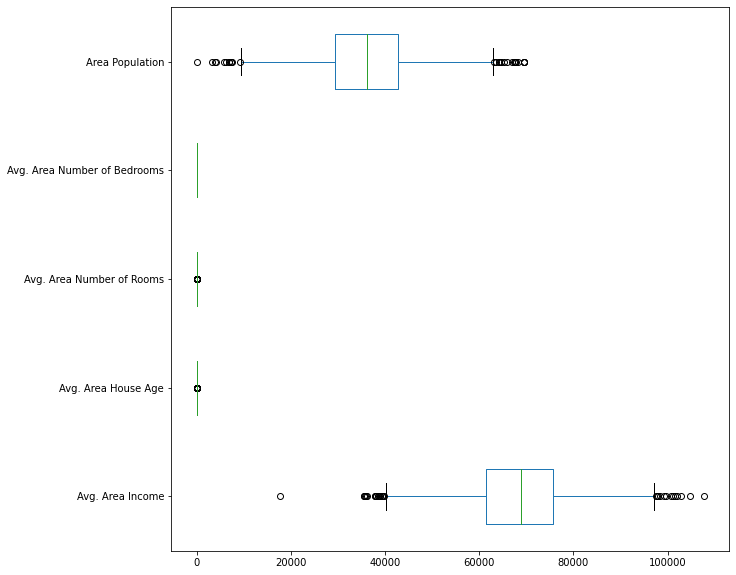

In [ ]:
# check outlier using boxplot - 1
df.boxplot(column=numeric_column,fontsize=10,rot=0,grid=False,figsize=(10,10),vert=False)

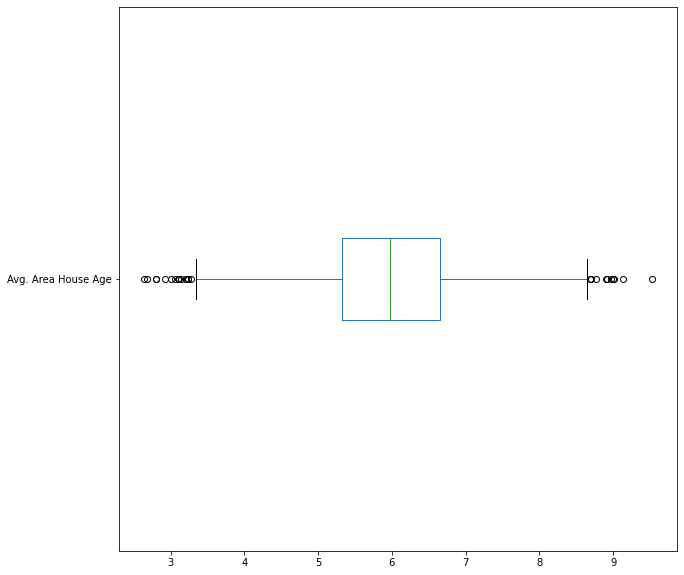

In [ ]:
df.boxplot(column=['Avg. Area House Age'],fontsize=10,rot=0,grid=False,figsize=(10,10),vert=False)

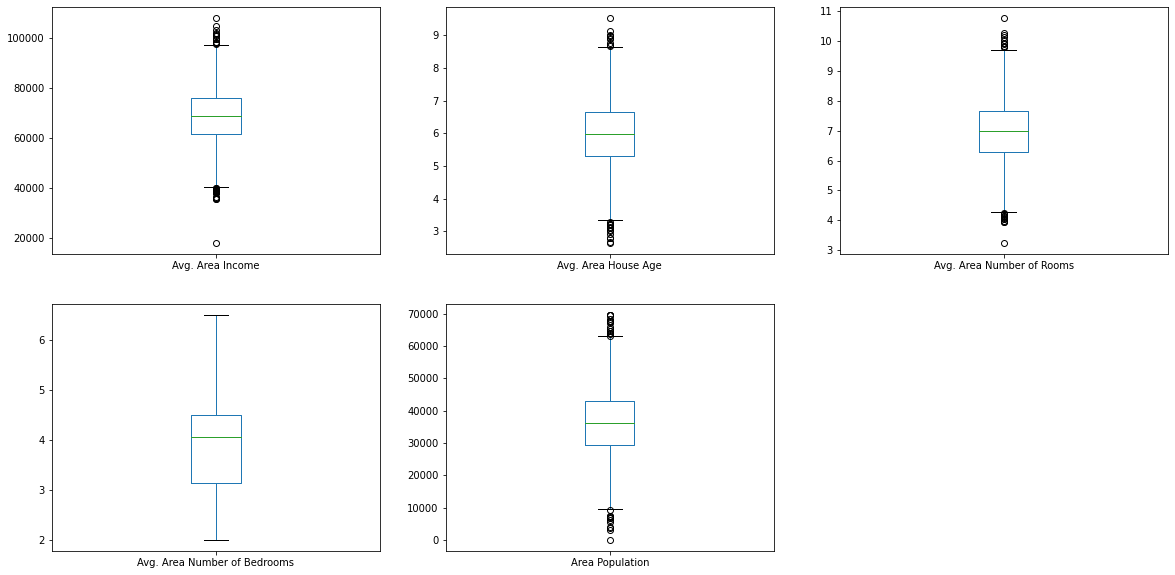

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))

for i,el in enumerate(numeric_column):
    a = df.boxplot(el, ax=axes.flatten()[i],grid=False)

fig.delaxes(axes[1][2])
plt.show()

In [ ]:
df.iloc[:,2:4]

,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms
0,7.009188,4.09
1,6.730821,3.09
2,8.512727,5.13
3,5.586729,3.26
4,7.839388,4.23
...,...,...
4995,6.137356,3.46
4996,6.576763,4.02
4997,4.805081,2.13
4998,7.130144,5.44


In [ ]:
df[['Avg. Area Income', 'Avg. Area House Age']]

# ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']

,Avg. Area Income,Avg. Area House Age
0,79545.458574,5.682861
1,79248.642455,6.002900
2,61287.067179,5.865890
3,63345.240046,7.188236
4,59982.197226,5.040555
...,...,...
4995,60567.944140,7.830362
4996,78491.275435,6.999135
4997,63390.686886,7.250591
4998,68001.331235,5.534388


In [ ]:
# get IQR for each numeric column
Q1 = df[numeric_column].quantile(0.25)
Q3 = df[numeric_column].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 Avg. Area Income                61480.562388
Avg. Area House Age                 5.322283
Avg. Area Number of Rooms           6.299250
Avg. Area Number of Bedrooms        3.140000
Area Population                 29403.928702
Name: 0.25, dtype: float64

Q3:
 Avg. Area Income                75783.338666
Avg. Area House Age                 6.650808
Avg. Area Number of Rooms           7.665871
Avg. Area Number of Bedrooms        4.490000
Area Population                 42861.290769
Name: 0.75, dtype: float64

IQR:
 Avg. Area Income                14302.776278
Avg. Area House Age                 1.328525
Avg. Area Number of Rooms           1.366621
Avg. Area Number of Bedrooms        1.350000
Area Population                 13457.362067
dtype: float64

Min:
 Avg. Area Income                40026.397972
Avg. Area House Age                 3.329495
Avg. Area Number of Rooms           4.249318
Avg. Area Number of Bedrooms        1.115000
Area Population                  9217.885601
dtype:

In [ ]:
# filter area income
filter_income_min = df['Avg. Area Income']<boxplot_min['Avg. Area Income']
filter_income_max = df['Avg. Area Income']>boxplot_max['Avg. Area Income']

# filter area population
filter_pop_min = df['Area Population']<boxplot_min['Area Population']
filter_pop_max = df['Area Population']>boxplot_max['Area Population']

# filter room
filter_room_min = df['Avg. Area Number of Rooms']<boxplot_min['Avg. Area Number of Rooms']
filter_room_max = df['Avg. Area Number of Rooms']>boxplot_max['Avg. Area Number of Rooms']

# filter house age
filter_house_min = df['Avg. Area House Age']<boxplot_min['Avg. Area House Age']
filter_house_max = df['Avg. Area House Age']>boxplot_max['Avg. Area House Age']

df_non_outlier = df[~(
    filter_income_min|filter_income_max|filter_pop_min|filter_pop_max|filter_room_min|filter_room_max|filter_house_min|filter_house_max
    )]

In [ ]:
df_non_outlier.shape

(4890, 7)

In [ ]:
df_non_outlier.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# **Handle Non-Metric Data**

In [ ]:
# read the data
df = pd.read_excel('student_grade_prediction.xlsx')
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,M,16,U,GT3,T,4,3,health,services,reputation,mother,1,4,0,no,no,no,yes,yes,yes,yes,no,4,2,2,1,1,2,4,19,19,20
1,GP,M,15,U,GT3,T,4,4,services,teacher,course,father,1,2,0,no,yes,no,yes,yes,yes,yes,no,4,3,3,1,1,5,2,19,18,18
2,MS,F,18,R,LE3,T,4,4,other,other,reputation,mother,2,3,0,no,no,no,no,yes,yes,yes,no,5,4,4,1,1,1,0,19,18,19
3,GP,F,17,U,GT3,T,4,4,services,teacher,home,mother,2,1,1,no,yes,no,no,yes,yes,yes,no,4,2,4,2,3,2,24,18,18,18
4,GP,M,15,U,LE3,T,4,2,teacher,other,course,mother,1,1,0,no,no,no,no,yes,yes,yes,no,3,5,2,1,1,3,10,18,19,19
5,GP,M,16,R,GT3,T,4,4,teacher,teacher,course,mother,1,1,0,no,no,yes,yes,yes,yes,yes,no,3,5,5,2,5,4,8,18,18,18
6,GP,M,15,U,LE3,A,4,4,teacher,teacher,course,mother,1,1,0,no,no,no,yes,yes,yes,yes,no,5,5,3,1,1,4,6,18,19,19
7,GP,M,16,U,GT3,T,2,1,other,other,course,mother,3,1,0,no,no,no,no,yes,yes,yes,no,4,3,3,1,1,4,6,18,18,18
8,GP,F,17,R,LE3,T,3,1,services,other,reputation,mother,2,4,0,no,yes,yes,no,yes,yes,no,no,3,1,2,1,1,3,6,18,18,18
9,GP,F,18,U,GT3,T,2,2,at_home,at_home,other,mother,1,3,0,no,yes,yes,no,yes,yes,yes,no,4,3,3,1,2,2,5,18,18,19


In [ ]:
# simple data checking - get row and column of dataframe
print(df.shape)

(395, 33)


In [ ]:
# simple data checking - get columns name
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [ ]:
# simple data checking - get dataframe general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
# check unique values - sex
df['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [ ]:
# transform into numerical using ordinal encoder - auto
encoder_sex_auto = OrdinalEncoder(categories='auto')
encoder_sex_auto.fit(df[['sex']])
df['sex_transform_auto'] = encoder_sex_auto.transform(df[['sex']])

In [ ]:
encoder_sex_auto.transform(df[['sex']])

In [ ]:
# transform into numerical using ordinal encoder - custom
encoder_sex_custom = OrdinalEncoder(categories=[['M','F']])
encoder_sex_custom.fit(df[['sex']])
df['sex_transform_custom'] = encoder_sex_custom.transform(df[['sex']])

In [ ]:
# check result ordinal encoder
df[['sex','sex_transform_auto','sex_transform_custom']].head(5)

,sex,sex_transform_auto,sex_transform_custom
0,M,1.0,0.0
1,M,1.0,0.0
2,F,0.0,1.0
3,F,0.0,1.0
4,M,1.0,0.0


In [ ]:
# check combination
df[['sex','sex_transform_auto','sex_transform_custom']].value_counts()

sex  sex_transform_auto  sex_transform_custom
F    0.0                 1.0                     208
M    1.0                 0.0                     187
dtype: int64

In [ ]:
df['sex']

0      M
1      M
2      F
3      F
4      M
      ..
390    M
391    M
392    M
393    F
394    M
Name: sex, Length: 395, dtype: object

In [ ]:
df[['sex']]

,sex
0,M
1,M
2,F
3,F
4,M
...,...
390,M
391,M
392,M
393,F


In [ ]:
# check unique values - Mjob
df['Mjob'].value_counts()

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

In [ ]:
# transform into numerical using pandas get dummies
mjob_transform_df = pd.get_dummies(df['Mjob'])
mjob_transform_df.head(5)

,at_home,health,other,services,teacher
0,0,1,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [ ]:
# column_name_mjob = list(mjob_transform_df.columns)+'test'
column_name_mjob = list(mjob_transform_df.columns)
column_name_mjob = ['mjob_'+s for s in column_name_mjob]
mjob_transform_df.columns = column_name_mjob

In [ ]:
print(mjob_transform_df.columns)

Index(['mjob_at_home', 'mjob_health', 'mjob_other', 'mjob_services',
       'mjob_teacher'],
      dtype='object')


In [ ]:
# join the get_dummies result dataframe with the original dataframe
df_with_dummies = pd.concat([df,mjob_transform_df],axis=1)

In [ ]:
# check result get_dummies
df_with_dummies[['Mjob']+column_name_mjob].head(5)

,Mjob,mjob_at_home,mjob_health,mjob_other,mjob_services,mjob_teacher
0,health,0,1,0,0,0
1,services,0,0,0,1,0
2,other,0,0,1,0,0
3,services,0,0,0,1,0
4,teacher,0,0,0,0,1


In [ ]:
# check combination
df_with_dummies[['Mjob']+column_name_mjob].value_counts()

Mjob      mjob_at_home  mjob_health  mjob_other  mjob_services  mjob_teacher
other     0             0            1           0              0               141
services  0             0            0           1              0               103
at_home   1             0            0           0              0                59
teacher   0             0            0           0              1                58
health    0             1            0           0              0                34
dtype: int64

# **Pandas Pipeline**

In [ ]:
# read the data
df = pd.read_csv('melb_data.csv')
df.head(5)

In [ ]:
# simple data checking - get row and column of dataframe
print(df.shape)

In [ ]:
# simple data checking - get columns name
print(df.columns)

In [ ]:
# simple data checking - get dataframe general information
df.info()

In [ ]:
# check standard missing value - multiple column
df[df.isnull().any(axis=1)]

In [ ]:
# handle missing data - replace values with mean - multiple column
replaced_value_df = df.copy()
replaced_value_df.fillna(df.mean(),axis=0,inplace=True)
replaced_value_df

In [ ]:
# handle missing data - replace values with mean - multiple column - string column
replaced_value_df.fillna(method='bfill',axis=0,inplace=True)
replaced_value_df.fillna(method='ffill',axis=0,inplace=True)
replaced_value_df

In [ ]:
# check standard missing value - multiple column
replaced_value_df[replaced_value_df.isnull().any(axis=1)]

In [ ]:
# assign variable for column in numeric type
numeric_column = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
                  'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']

In [ ]:
# check outlier using boxplot
replaced_value_df.boxplot(column=numeric_column,fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(20,10))

for i,el in enumerate(numeric_column):
    a = replaced_value_df.boxplot(el, ax=axes.flatten()[i],grid=False)

plt.show()

In [ ]:
# get IQR for each numeric column
Q1 = replaced_value_df[numeric_column].quantile(0.25)
Q3 = replaced_value_df[numeric_column].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

In [ ]:
# remove outlier
non_outlier_df = replaced_value_df.copy()
for x in numeric_column:
  filter_min = non_outlier_df[x]<boxplot_min[x]
  filter_max = non_outlier_df[x]>boxplot_max[x]
  non_outlier_df = non_outlier_df[~(
    filter_min|filter_max
    )]

In [ ]:
non_outlier_df.head(5)

In [ ]:
non_outlier_df.shape

In [ ]:
# assign variable for column in categorical type
categorical_column = ['Suburb','Type','Method','CouncilArea','Regionname']

In [ ]:
# transform into numerical using ordinal encoder - auto
categorical_df = non_outlier_df.copy()
encoder_auto = OrdinalEncoder(categories='auto')
encoder_auto.fit(categorical_df[categorical_column])
categorical_df[categorical_column] = encoder_auto.transform(categorical_df[categorical_column])
categorical_df.head(5)

In [ ]:
final_column = ['Suburb', 'Rooms', 'Type', 'Price', 'Method',
                           'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
                           'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
                           'Regionname', 'Propertycount']
final_df = categorical_df[final_column]
final_df

In [ ]:
def copy_dataframe(df):
  df_copy = df.copy()
  return df_copy

def delete_missing_values(df):
  df.fillna(df.mean(),axis=0,inplace=True)
  df.fillna(method='bfill',axis=0,inplace=True)
  df.fillna(method='ffill',axis=0,inplace=True)
  return df

def delete_outlier(df,numeric_column):
  Q1 = df[numeric_column].quantile(0.25)
  Q3 = df[numeric_column].quantile(0.75)
  IQR = Q3 - Q1
  boxplot_min = Q1 - 1.5 * IQR
  boxplot_max = Q3 + 1.5 * IQR
  for x in numeric_column:
    filter_min = df[x]<boxplot_min[x]
    filter_max = df[x]>boxplot_max[x]
    df = df[~(
      filter_min|filter_max
      )]
  return df

def categorical_transform(df,categorical_column):
  encoder_auto = OrdinalEncoder(categories='auto')
  encoder_auto.fit(df[categorical_column])
  df[categorical_column] = encoder_auto.transform(df[categorical_column])
  return df

def filter_column(df,final_column):
  df = df[final_column]
  return df

In [ ]:
df_cleaned = (df.pipe(copy_dataframe).
              pipe(delete_missing_values).
              pipe(delete_outlier,numeric_column).
              pipe(categorical_transform,categorical_column).
              pipe(filter_column,final_column)
              )
df_cleaned

In [ ]:
df

## Task
Do EDA using water potability data that are explained here: https://www.kaggle.com/adityakadiwal/water-potability